In [39]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

In [40]:
def fake_states(time, z):
    mass_planet = 6e24
    gravity_c = 6.674e-11
    
    z_d = np.empty(4)
    z_d[0] = z[1]
    z_d[1] = (-gravity_c * mass_planet * z[0]) / (((z[0]**2) + (z[2]**2))**(3/2))
    z_d[2] = z[3]
    z_d[3] = (-gravity_c * mass_planet * z[2]) / (((z[0]**2) + (z[2]**2))**(3/2))

    return z_d

In [41]:
time_span = (0, 30000)

x_position = 100000
x_velocity = 0
y_position = 100000
y_velocity = 0

z_initial = np.array([x_position, x_velocity, y_position, y_velocity])

# Solve the ODE
solve_scipy = solve_ivp(fake_states,
                        time_span,
                        z_initial,
                        t_eval=np.linspace(0, 30000, 100000, endpoint=True))

time = solve_scipy.t
y = solve_scipy.y.T

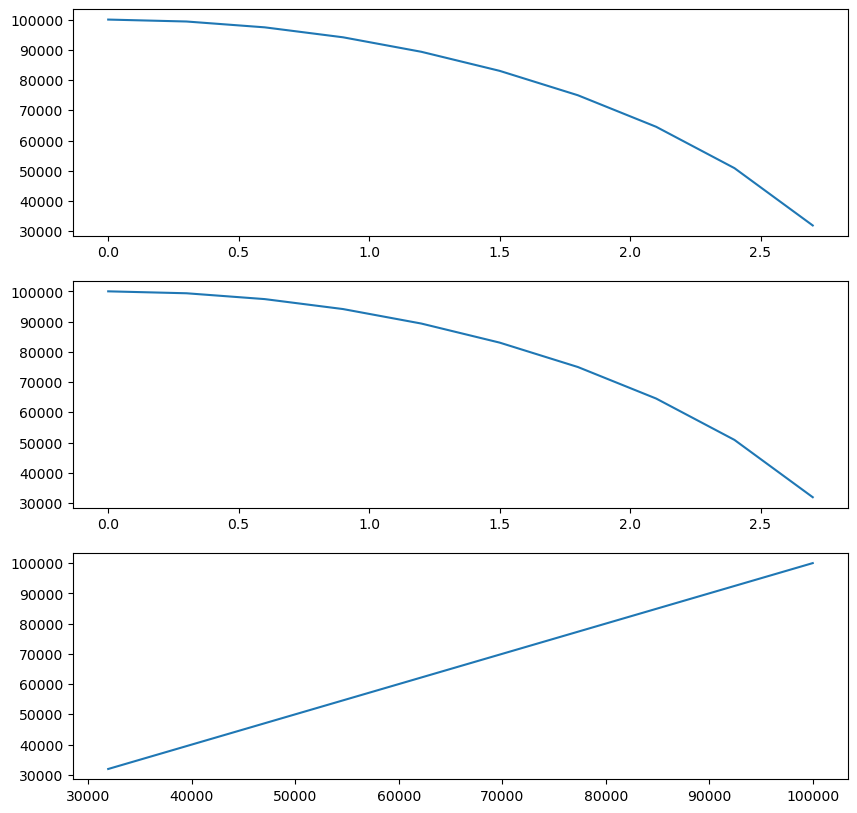

In [42]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

axes[0].plot(time, y[:, 0])

axes[1].plot(time, y[:, 2])

axes[2].plot(y[:, 0], y[:, 2])